# **Author : Jaya Shukla**
## Data Science & Business Analytics @ The Sparks Foundation
### Task 2 : Prediction using Unsupervised Machine Learning
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

## Step 1 : Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

## Step 2 : Loading the dataset

In [3]:
df = load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 3 : Standardizing to avoid bias

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_norm = sc.fit_transform(df)

## Step 4 : Finding the optimum number of clusters

In [7]:
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

,num_cluster,cluster_errors
0,1,600.000000
1,2,222.361705
2,3,140.032753
3,4,114.504553
4,5,90.807592
5,6,81.504739
6,7,70.734022
7,8,62.519488
8,9,54.484128
9,10,47.537027


## Step 5 : Plotting elbow curve to observe the pattern of clusters

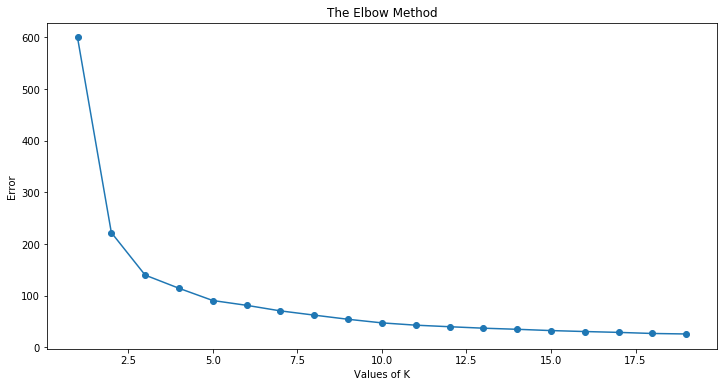

In [8]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method') 
plt.show() 

The optimal clusters are formed where the elbow occurs.
Here, '3' is the optimal number of cluster.

## Step 6 : Creating object of the model

In [9]:
model = KMeans(n_clusters=3, max_iter=50)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Step 7 : Analysis of the cluster found

In [10]:
df.index = pd.RangeIndex(len(df.index))
df_km = pd.concat([df, pd.Series(model.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

In [11]:
df2 = pd.concat([pd.Series([0,1,2]), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth], axis=1)
df2.columns = ['ClusterID','sepal length (cm)_mean','sepal width (cm)_mean','petal length (cm)_mean','petal width (cm)_mean']
df2.head()

,ClusterID,sepal length (cm)_mean,sepal width (cm)_mean,petal length (cm)_mean,petal width (cm)_mean
0,0,6.850000,3.073684,5.742105,2.071053
1,1,5.006000,3.428000,1.462000,0.246000
2,2,5.901613,2.748387,4.393548,1.433871


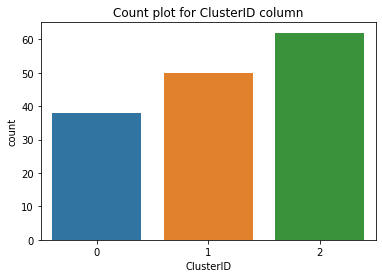

In [12]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

## Step 8 : Hierarchical clustering with full dendrogram

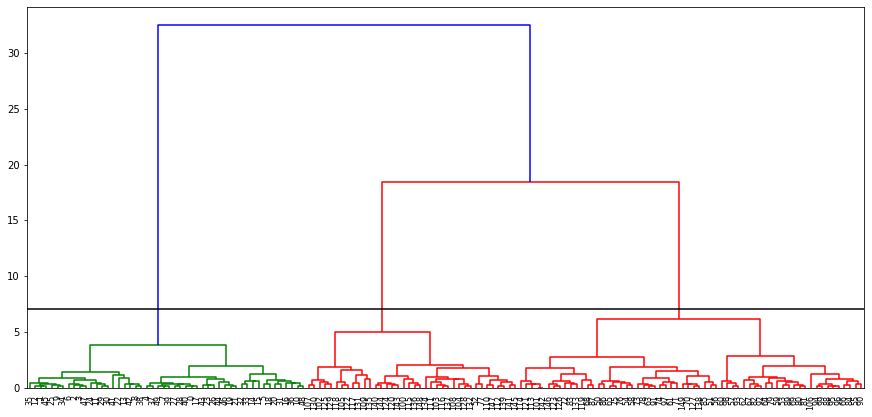

In [13]:
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

max_d = 7.08                
dendrogram(mergings,
           truncate_mode='lastp',  
           p=150,                  
           leaf_rotation=90.,      
           leaf_font_size=8.,      
          )

plt.axhline(y=max_d, c='k')
plt.show()

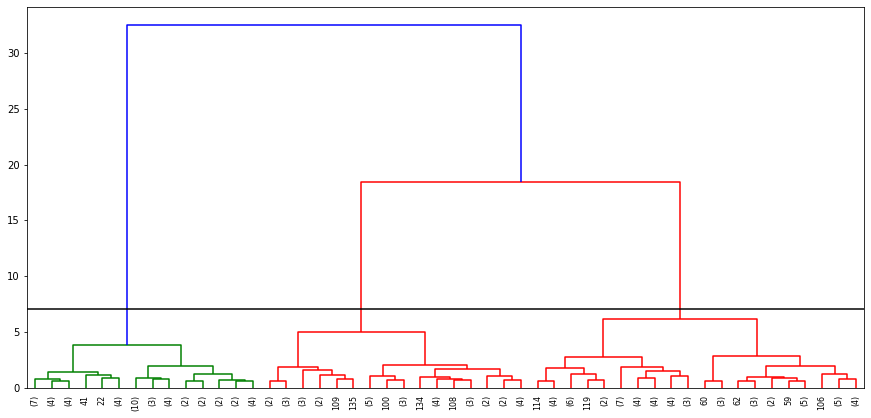

In [14]:
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

max_d = 7.08                
dendrogram(mergings,
           truncate_mode='lastp', 
           p=50,                  
           leaf_rotation=90.,     
           leaf_font_size=8.,      
          )

plt.axhline(y=max_d, c='k')
plt.show()

From the above two dendrograms for different values of p(cut-off), we can say there are three clusters.

## Step 9 : Scatter plot to visualize the clusters

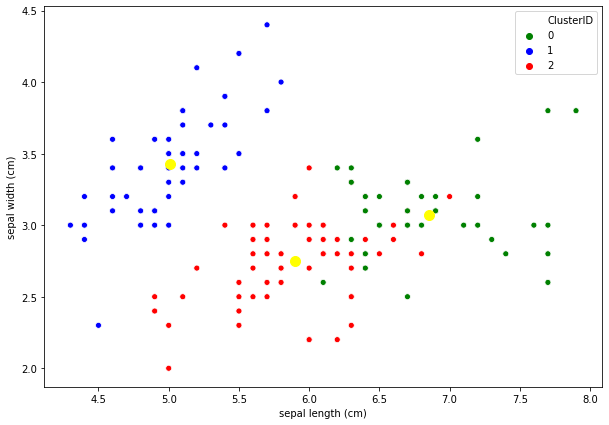

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=df_km, hue='ClusterID', palette=['green','blue','red'])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.show()